In [ ]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

C:\Users\deepr\AppData\Local\Temp\ipykernel_6944\3985943656.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
df = pd.read_csv('world-data-2023.csv')

In [17]:
df.head()

,Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"6,52,230","3,23,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"3,80,41,754",48.90%,9.30%,71.40%,11.12%,"97,97,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"28,54,191",55.70%,18.60%,36.60%,12.33%,"17,47,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"23,81,741","3,17,000",24.28,213.0,Algiers,"1,50,006",...,28.10%,1.72,"4,30,53,054",41.20%,37.20%,66.10%,11.70%,"3,15,10,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"12,46,700","1,17,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"3,18,25,295",77.50%,9.20%,49.10%,6.89%,"2,10,61,025",-11.202692,17.873887


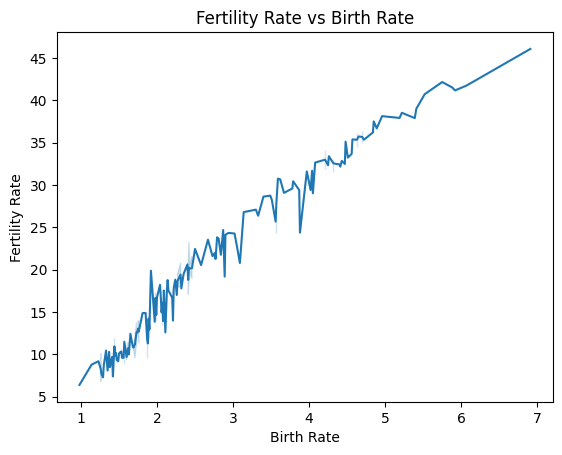

In [7]:
# Line Chart
sns.lineplot(data=df, x='Fertility Rate', y='Birth Rate')
plt.title('Fertility Rate vs Birth Rate')
plt.xlabel('Birth Rate')
plt.ylabel('Fertility Rate')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

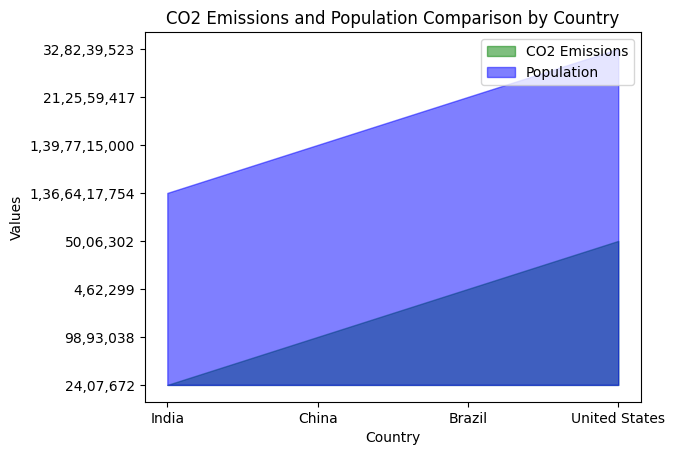

In [19]:
# Area Chart

countries = ['India', 'Brazil', 'China', 'United States']
df_selected = df[df['Country'].isin(countries)]

# Sorting data by Population to make the area chart meaningful
df_selected = df_selected.sort_values(by='Population')

# Plotting the Area Chart
plt.fill_between(df_selected['Country'], df_selected['Co2-Emissions'], color='green', alpha=0.5, label='CO2 Emissions')
plt.fill_between(df_selected['Country'], df_selected['Population'], color='blue', alpha=0.5, label='Population')

# Adding titles and labels
plt.title('CO2 Emissions and Population Comparison by Country')
plt.xlabel('Country')
plt.ylabel('Values')

plt.legend()

plt.show()


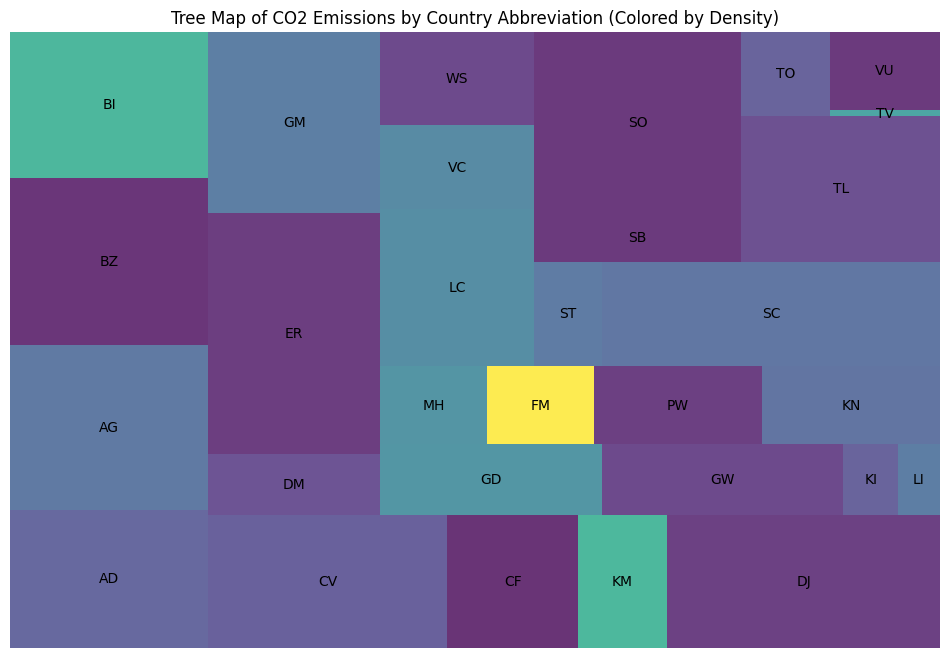

In [20]:
# Tree Map
df['Co2-Emissions'] = pd.to_numeric(df['Co2-Emissions'], errors='coerce')
df['Density(P/Km2)'] = pd.to_numeric(df['Density(P/Km2)'], errors='coerce')


sizes = df['Co2-Emissions'].dropna()
labels = df['Abbreviation'].loc[sizes.index]  
density_values = df['Density(P/Km2)'].loc[sizes.index]


norm = plt.Normalize(density_values.min(), density_values.max())
colors = plt.cm.viridis(norm(density_values))


plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Tree Map of CO2 Emissions by Country Abbreviation (Colored by Density)')
plt.axis('off')
plt.show()

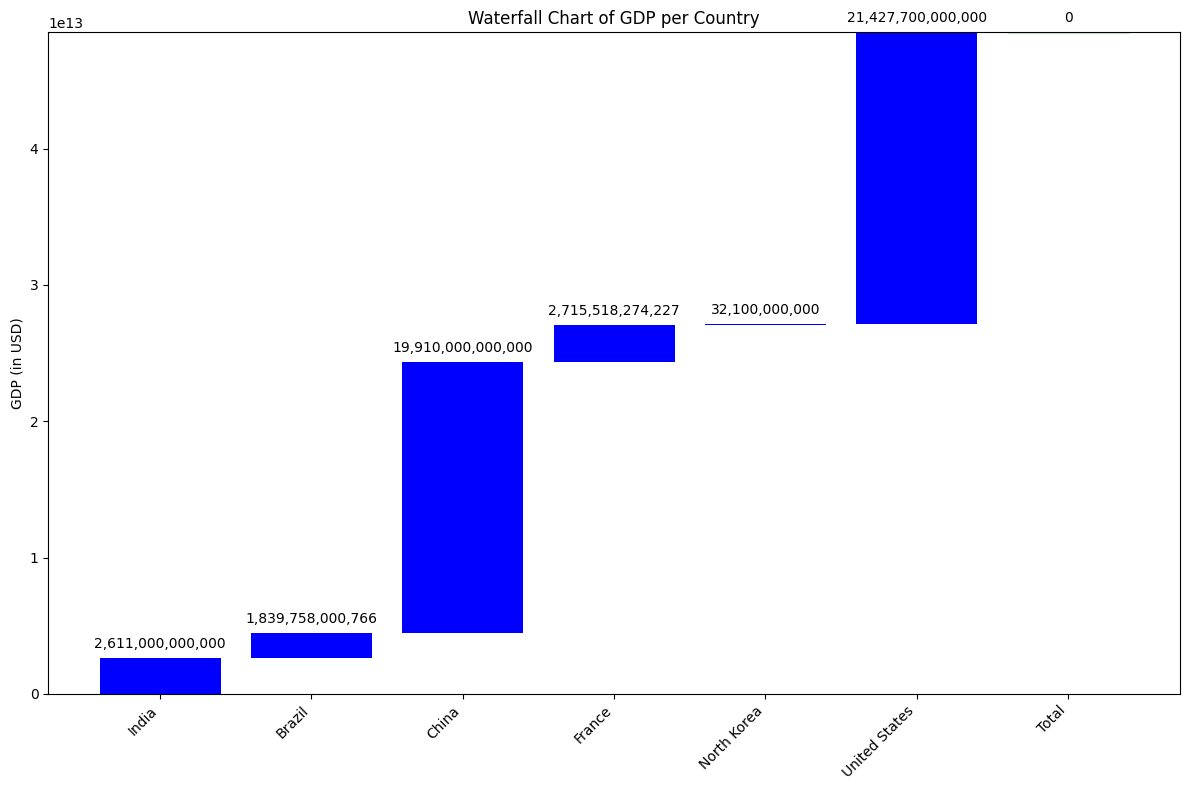

In [6]:
# Waterfall Chart

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Country': ['India', 'Brazil', 'China', 'France', 'North Korea', 'United States'],  # Replace with actual countries
    'GDP': [2611000000000 , 1839758000766 , 19910000000000 , 2715518274227 , 32100000000 ,21427700000000  ]  # Replace with actual GDP values
}

df = pd.DataFrame(data)

total_gdp = df['GDP'].sum()

df['Cumulative_GDP'] = df['GDP'].cumsum()
df_total = pd.DataFrame({'Country': ['Total'], 'GDP': [total_gdp], 'Cumulative_GDP': [total_gdp]})
df = pd.concat([df, df_total])
df['Previous_Cumulative_GDP'] = df['Cumulative_GDP'].shift(1).fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df['Country'], df['Cumulative_GDP'] - df['Previous_Cumulative_GDP'], bottom=df['Previous_Cumulative_GDP'], color='blue')
bars[-1].set_color('green')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Set labels and title
ax.set_ylabel('GDP (in USD)')
ax.set_title('Waterfall Chart of GDP per Country')

plt.tight_layout()
plt.show()


In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Donut Chart

import pandas as pd
import plotly.express as px

# Sample DataFrame - Replace with your actual data
data = {
    'Country': ['Country A', 'Country B', 'Country C', 'Country D'],
    'GDP': [2000, 2100, 2200, 2300],
    'Co2-Emissions': [300, 400, 350, 450],
    'Population': [50, 60, 55, 65],
    'Tax Revenue': [150, 160, 170, 180],
    'Urban Population': [30, 35, 32, 40]
}
df = pd.DataFrame(data)

# Ensure columns are numeric
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')
df['Co2-Emissions'] = pd.to_numeric(df['Co2-Emissions'], errors='coerce')
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['Tax Revenue'] = pd.to_numeric(df['Tax Revenue'], errors='coerce')
df['Urban Population'] = pd.to_numeric(df['Urban Population'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['GDP', 'Co2-Emissions', 'Population', 'Tax Revenue', 'Urban Population'])

# Create a summary DataFrame for the funnel chart
data = {
    'Stage': ['GDP', 'Population', 'Urban Population', 'Tax Revenue', 'CO2 Emissions'],
    'Value': [
        df['GDP'].sum(),
        df['Population'].sum(),
        df['Urban Population'].sum(),
        df['Tax Revenue'].sum(),
        df['Co2-Emissions'].sum()
    ]
}
funnel_df = pd.DataFrame(data)

# Create the funnel chart
fig = px.funnel(funnel_df, x='Value', y='Stage', title='Funnel Chart with Assumed Values')

# Display the funnel chart
fig.show()


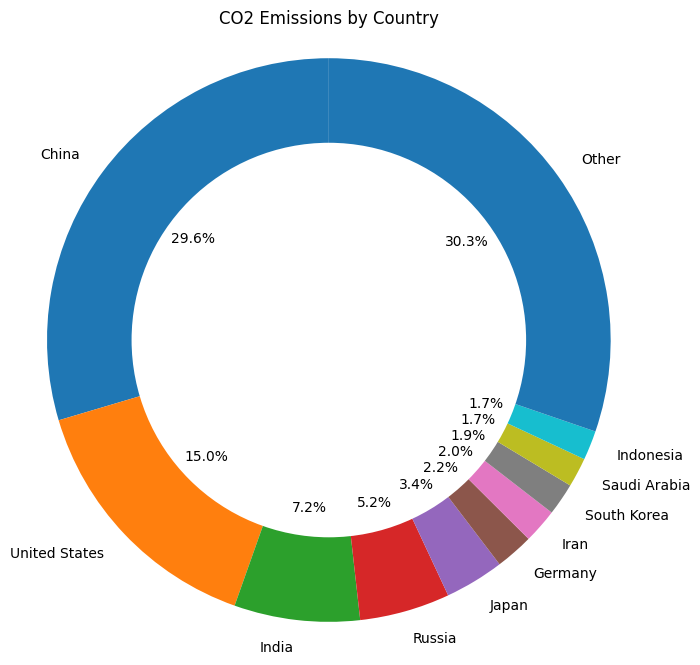

In [23]:
# Donut Chart

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('world-data-2023.csv')

# Clean the 'Co2-Emissions' column
df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '').astype(float)

# Check for NaN values and remove them
df = df.dropna(subset=['Co2-Emissions'])

# Sort and select the top N countries
top_n = 10
df_sorted = df.sort_values(by='Co2-Emissions', ascending=False)
top_countries = df_sorted.head(top_n)
other_countries = df_sorted.tail(len(df_sorted) - top_n)

# Combine other countries into one category
other_countries_summary = pd.DataFrame({
    'Country': ['Other'],
    'Co2-Emissions': [other_countries['Co2-Emissions'].sum()]
})

# Concatenate the top countries with the 'Other' category
final_df = pd.concat([top_countries, other_countries_summary], ignore_index=True)

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(final_df['Co2-Emissions'], labels=final_df['Country'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('CO2 Emissions by Country')

plt.show()


C:\Users\deepr\AppData\Local\Temp\ipykernel_15676\3860484048.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




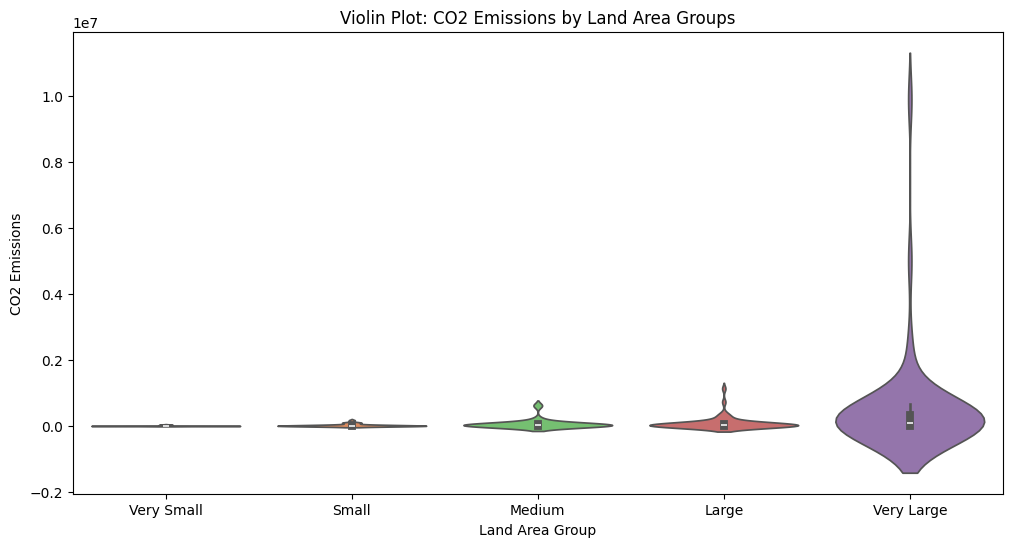

In [25]:
# Violin Plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('world-data-2023.csv')

df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '').astype(float)

df['Land Area(Km2)'] = pd.to_numeric(df['Land Area(Km2)'].str.replace(',', ''), errors='coerce')
df = df.dropna(subset=['Land Area(Km2)'])  # Dropping rows where 'Land Area(Km2)' is NaN

# Create a values based on Land Area (Km2)
bins = [0, 10000, 50000, 100000, 500000, float('inf')] 
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

# Checking for non-numeric values
if df['Land Area(Km2)'].dtype == 'object':
    df['Land Area(Km2)'] = pd.to_numeric(df['Land Area(Km2)'].str.replace(',', ''), errors='coerce')

df['IncomeGroup'] = pd.cut(df['Land Area(Km2)'], bins=bins, labels=labels)

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='IncomeGroup', y='Co2-Emissions', data=df, palette="muted")

plt.title('Violin Plot: CO2 Emissions by Land Area Groups')
plt.xlabel('Land Area Group')
plt.ylabel('CO2 Emissions')

plt.show()
